Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
hierarchical clustering?

Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
clustering?

Q4. How does DBSCAN clustering handle outliers in a dataset?

Q5. How does DBSCAN clustering differ from k-means clustering?

Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
some potential challenges?

Q7. How does DBSCAN clustering handle clusters with varying densities?

Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

Q10. How does DBSCAN clustering handle datasets with noise or missing values?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

In [61]:
x,y = make_moons(n_samples=500,noise=0.2,random_state=42)

In [21]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

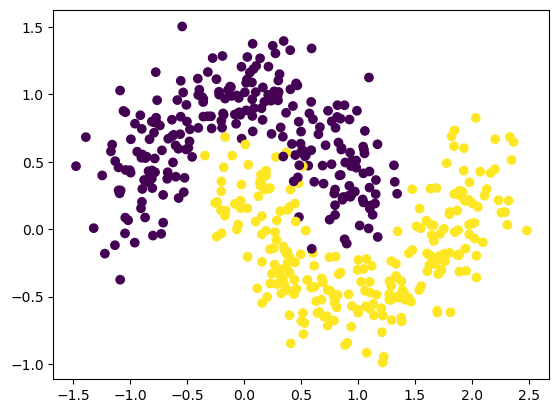

In [63]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [83]:
sc =StandardScaler()
x_trains = sc.fit_transform(x_train)
x_tests = sc.fit_transform(x_test)

In [85]:
db = DBSCAN(eps= 0.23)

In [87]:
db.fit(x_trains)

DBSCAN(eps=0.23)

In [89]:
db.labels_

array([ 1,  0,  1,  1,  1,  1,  2,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  0,  1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1, -1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  2, -1, -1, -1,
        2,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1

In [91]:
silhouette_score(x_trains, db.labels_)

-0.08313906765018181

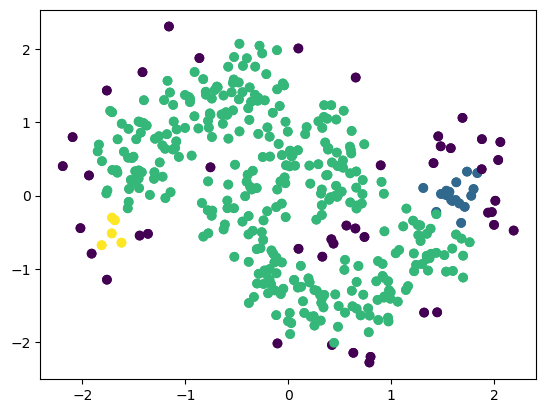

In [97]:
plt.scatter(x_trains[:,0],x_trains[:,1],c=db.labels_)
plt.show()

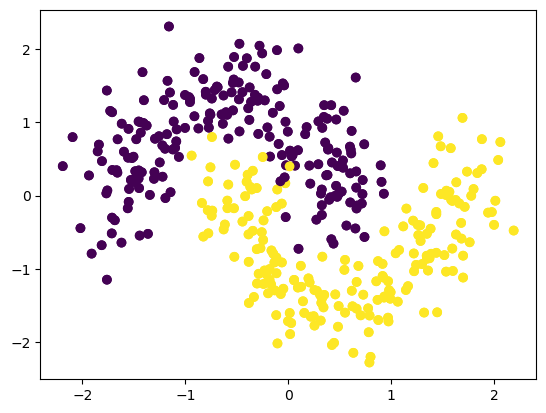

In [101]:
plt.scatter(x_trains[:,0],x_trains[:,1],c=y_train)
plt.show()

In [109]:
db.fit(x_tests)
db.labels_

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1, -1,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  2,
        0, -1, -1,  0, -1,  2, -1, -1, -1,  1,  2, -1, -1, -1,  0],
      dtype=int64)

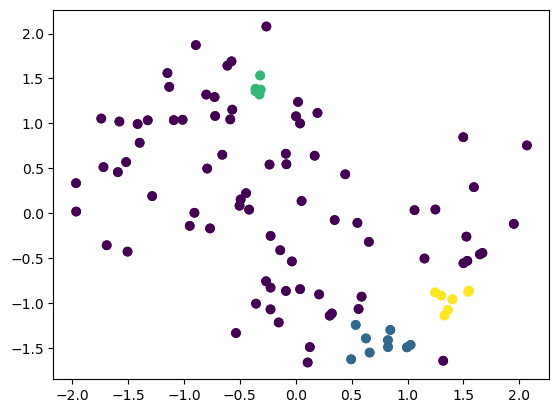

In [113]:
plt.scatter(x_tests[:,0],x_tests[:,1],c=db.labels_)
plt.show()